In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
orig_ts = [0.2, 0, 0.8, 0.85, 
           0.86, 0.84, 0.8, 0.25,
           0.05, 0.5, 0.2, 0.95,
           1, 0.93, 0.3, 0.1,
           0.9, 1, 0.98]

# Global epsilon here 
epsilon = 0.05
# Global epsilon here 
y_points = 5
y_ind = len(orig_ts) - y_points - 1
# Use the last 4 points as y, 
# -1 is used for creating connective plot

y_inds = list(range(y_ind, len(orig_ts)))

inp_x = orig_ts[:y_ind + 1]
# +1 is used for creating connective plot
y = orig_ts[y_ind:]

In [3]:
small_plot_width = 3/len(orig_ts)*(len(orig_ts)-y_points)
# plot width for input time series and adv examples

### Original Time Series

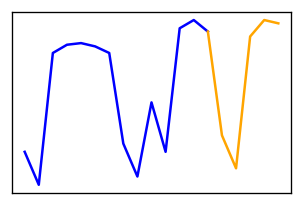

In [4]:
plt.rcParams.update({"figure.figsize": (3, 2), "figure.dpi": 120})

plt.plot(inp_x, color="Blue")
plt.plot(y_inds, y, color="Orange")
plt.tick_params(
    axis="both",          # changes apply to the y-axis
    which="both",      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False, # labels along the bottom edge are off
    labeltop=False, 
    labelleft=False, 
    labelright=False) 
plt.show()

### $T_X$

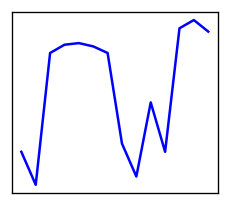

In [5]:
plt.rcParams.update({"figure.figsize": (small_plot_width, 2), "figure.dpi": 120})

plt.plot(inp_x, color="Blue")
plt.tick_params(
    axis="both",          # changes apply to the y-axis
    which="both",      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False, # labels along the bottom edge are off
    labeltop=False, 
    labelleft=False, 
    labelright=False) 
plt.show()

### $\eta$ for FGSM

In [6]:
fgsm_eta = [epsilon,epsilon,-epsilon,-epsilon,
            epsilon,-epsilon,-epsilon,epsilon,
            epsilon,epsilon,-epsilon,epsilon,
            -epsilon,epsilon]

fgsm_adv_x = np.array(inp_x) + np.array(fgsm_eta)

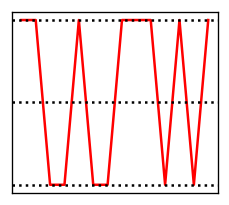

In [7]:
plt.rcParams.update({"figure.figsize": (small_plot_width, 2), "figure.dpi": 120})

plt.plot(fgsm_eta, color="Red")
# Epsilon = 0.1
plt.axhline(y = epsilon, ls = ':', color = "black")
plt.axhline(y = 0, ls = ':', color = "black")
plt.axhline(y = -epsilon, ls = ':', color = "black")
plt.tick_params(
    axis="both",          # changes apply to the y-axis
    which="both",      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False, # labels along the bottom edge are off
    labeltop=False, 
    labelleft=False, 
    labelright=False) 
plt.show()

### Achieve adv goal for FGSM

In [8]:
adv_y = [1, 0.8, 1.02, 1.04, 1.06]
fgsm_adv_y = [fgsm_adv_x[-1]] + adv_y

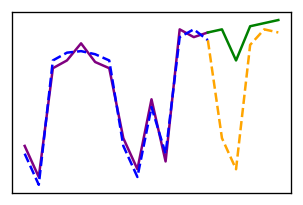

In [9]:
plt.rcParams.update({"figure.figsize": (3, 2), "figure.dpi": 120})

plt.plot(fgsm_adv_x, color="Purple")
plt.plot(inp_x, color="Blue", ls="--")
plt.plot(y_inds, y, color="Orange", ls="--")
plt.plot(y_inds, fgsm_adv_y, color="Green")
plt.tick_params(
    axis="both",          # changes apply to the y-axis
    which="both",      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False, # labels along the bottom edge are off
    labeltop=False, 
    labelleft=False, 
    labelright=False) 
plt.show()

### $\eta$ for BIM

In [10]:
alpha = epsilon/100

In [11]:
bim_adj_eta = [-30*alpha,-25*alpha,0*alpha,10*alpha,
            -18*alpha,25*alpha,20*alpha,-12*alpha,
            0*alpha,0*alpha,30*alpha,0*alpha,
            45*alpha,0*alpha]
bim_eta = np.array(bim_adj_eta) + fgsm_eta 
bim_adv_x = np.array(inp_x) + bim_eta

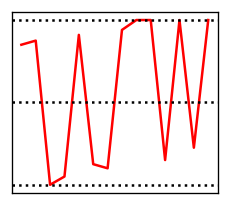

In [12]:
plt.rcParams.update({"figure.figsize": (small_plot_width, 2), "figure.dpi": 120})

plt.plot(bim_eta, color="Red")
# Epsilon = 0.1
plt.axhline(y = epsilon, ls = ':', color = "black")
plt.axhline(y = 0, ls = ':', color = "black")
plt.axhline(y = -epsilon, ls = ':', color = "black")
plt.tick_params(
    axis="both",          # changes apply to the y-axis
    which="both",      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False, # labels along the bottom edge are off
    labeltop=False, 
    labelleft=False, 
    labelright=False) 
plt.show()

### Achieve adv goal for BIM

In [13]:
#adv_y = [1, 0.8, 1.02, 1.04, 1.06]
bim_adv_y = [bim_adv_x[-1]] + adv_y

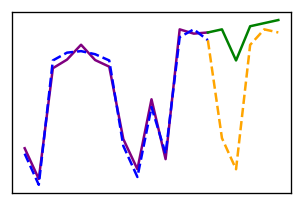

In [14]:
plt.rcParams.update({"figure.figsize": (3, 2), "figure.dpi": 120})

plt.plot(bim_adv_x, color="Purple")
plt.plot(inp_x, color="Blue", ls="--")
plt.plot(y_inds, y, color="Orange", ls="--")
plt.plot(y_inds, bim_adv_y, color="Green")
plt.tick_params(
    axis="both",          # changes apply to the y-axis
    which="both",      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False, # labels along the bottom edge are off
    labeltop=False, 
    labelleft=False, 
    labelright=False) 
plt.show()

### $\eta$ for nvita
when n = 3

In [15]:
nvita_eta = [np.nan]*len(bim_adj_eta)
nvita_eta[3] = -0.9*epsilon
nvita_eta[8] = 0.5*epsilon
nvita_eta[13] = 1*epsilon

nvita_adv_x = np.array(inp_x) + np.nan_to_num(nvita_eta, nan=0)

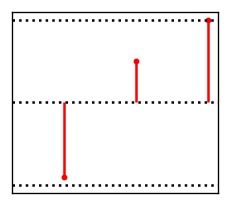

In [16]:
plt.rcParams.update({"figure.figsize": (small_plot_width, 2), "figure.dpi": 120})

markerline, stemlines, baseline = plt.stem(nvita_eta, markerfmt='ro')
plt.setp(markerline, "markerfacecolor", "r", markersize = 2.5)
plt.setp(stemlines, "color", "Red")
plt.setp(baseline, color="r", linewidth=0)

plt.axhline(y = epsilon, ls = ':', color = "black")
plt.axhline(y = 0, ls = ':', color = "black")
plt.axhline(y = -epsilon, ls = ':', color = "black")
plt.tick_params(
    axis="both",          # changes apply to the y-axis
    which="both",      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False, # labels along the bottom edge are off
    labeltop=False, 
    labelleft=False, 
    labelright=False) 
plt.show()

### Achieve adv goal for nvita

In [17]:
#adv_y = [1, 0.8, 1.02, 1.04, 1.06]
nvita_adv_y = [nvita_adv_x[-1]] + adv_y

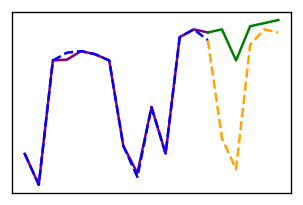

In [18]:
plt.rcParams.update({"figure.figsize": (3, 2), "figure.dpi": 120})

plt.plot(nvita_adv_x, color="Purple")
plt.plot(inp_x, color="Blue", ls="--")
plt.plot(y_inds, y, color="Orange", ls="--")
plt.plot(y_inds, nvita_adv_y, color="Green")
plt.tick_params(
    axis="both",          # changes apply to the y-axis
    which="both",      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False, # labels along the bottom edge are off
    labeltop=False, 
    labelleft=False, 
    labelright=False) 
plt.show()